In [9]:
import pandas as pd
import numpy as np
from caits import visualization as vis
from caits import preprocessing as preproc

In [10]:
sampling_rate = 1000
duration = 1.0

t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
n_samples = t.shape[0]

# Channel 1: sine wave, no offset
ch1 = np.sin(2 * np.pi * 5 * t)  # 5 Hz

# Channel 2: same sine wave, larger amplitude + offset
ch2 = 10 * np.sin(2 * np.pi * 5 * t)

# Channel 3: padded noise before and after sine
ch3 = np.zeros_like(t)
sine_segment = np.sin(2 * np.pi * 5 * t[int(0.25*n_samples):int(0.75*n_samples)])
ch3[int(0.25*n_samples):int(0.75*n_samples)] = sine_segment

data = np.stack((ch1, ch2, ch3), axis=-1)

data.shape

(1000, 3)

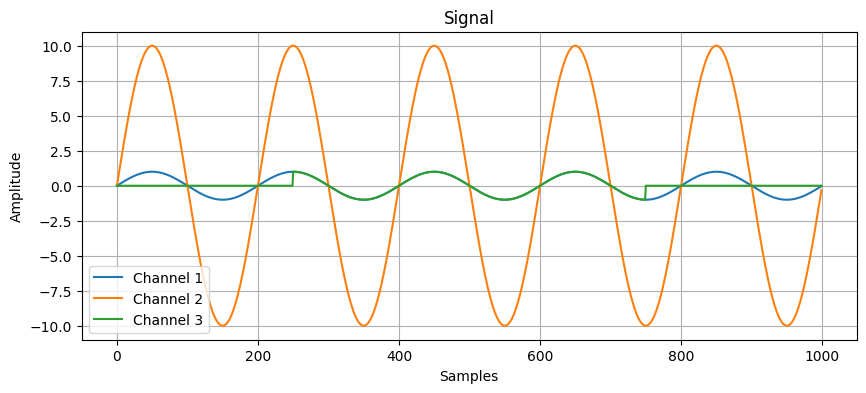

In [11]:
fig = vis.plot_signal(data, sr=sampling_rate)

In [12]:
normalized_data = preproc.normalize_signal(data)
normalized_data.shape

(1000, 3)

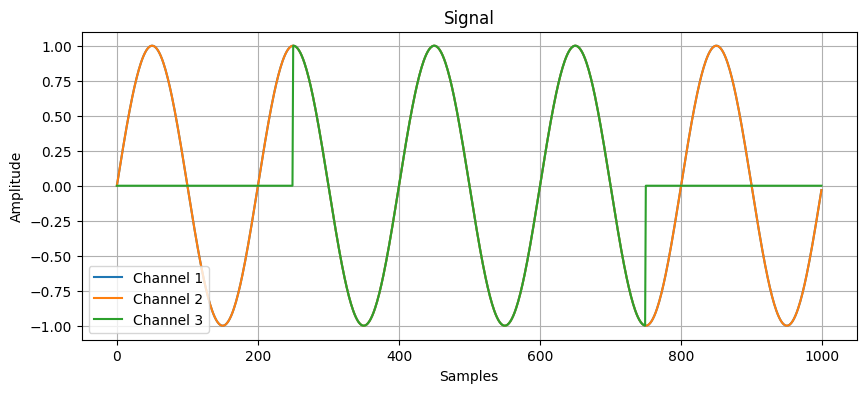

In [13]:
fig = vis.plot_signal(normalized_data, sr=sampling_rate)

In [14]:
resampled_data = preproc.resample_2d(data, sampling_rate, 50)
resampled_data.shape

(50, 3)

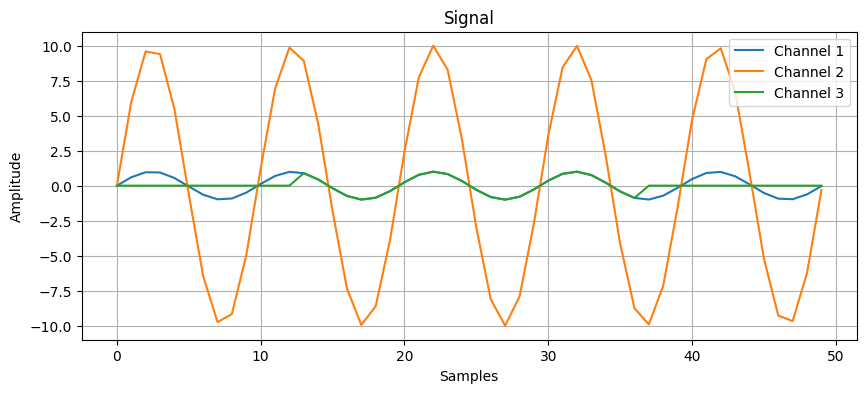

In [15]:
fig = vis.plot_signal(resampled_data, sr=50)